In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from scipy.stats import pearsonr

We are using the data from Taarifa and Tanzanian Ministry of Water to predict which water pumps are functional, functional needs repairs, and non functional. The data was collected using handheld sensor, paper reports, and user feedback via cellular phones. The dataset has features such as the location of the pump, water quality, source type, extraction technique used, and population demographics of pump location. The training set has 59,401 rows and 40 features including an output column. The output column specifies the status of the water pump in the category of functional, functional needs repairs, or non functional. Out of the 40 features in the data, we have 31 categorical variables, 7 numerical variables, and 2 date variable.

In [4]:
train_data = pd.read_csv('advance projecttraining set values.csv')
#train_target = pd.read_csv('advance project\training set labels.csv')



FileNotFoundError: [Errno 2] File advance project/training set values.csv does not exist: 'advance project/training set values.csv'

My dataset has lot of missing values and these outliers are relatively more in numbers.So i decided to drop them.

In [260]:
train_data = train_data[train_data['gps_height']>0]
train_data = train_data[train_data['construction_year']>0]
train_data = train_data[train_data['population']>1]
train_data = train_data[train_data['population']<500]


In [261]:
# Merge data and labels together in one dataframe.
train_data = pd.merge(train_data, train_target, on='id')
del train_target
train_data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

I have choosen three numerical random variables ['gps_height','construction_year','population']

In [264]:
df_2 = train_data[['gps_height','construction_year','population','status_group']]

The first random variable is gps_height.It decribes the altitude of the water pumps that are located in tanzania.
Data value space for this continuous random variable theoritically is defined by the set of integers greater than zero.Since this random variable is a continous random variable,i have map it on a discrete value space by creating 10 bins. As we can see below, the differnet bins that are created are listed next to the number of datapoints in each bins. the new bins will represent the discrete data value space for this random variable

In [266]:
pd.cut(df_2['gps_height'], 10).value_counts()

(1314.5, 1577.2]    4766
(1051.8, 1314.5]    4125
(263.7, 526.4]      3426
(1577.2, 1839.9]    3164
(-1.627, 263.7]     3032
(789.1, 1051.8]     2436
(526.4, 789.1]      1224
(1839.9, 2102.6]    1012
(2102.6, 2365.3]     420
(2365.3, 2628.0]      20
Name: gps_height, dtype: int64

In [ ]:
The plot below shows the distribution of the new discrete data value space of gps_height random variable.

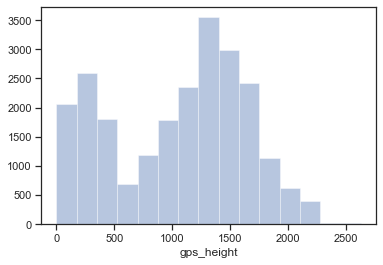

In [235]:
sns.distplot(df_2.gps_height, bins =15 ,kde=False)

The second random variable is construction_year .It decribes the year in which the waterpoint was constructed.Data value space for this random variable theoritically is defined by set of years before the data was recorded.Although this random variable gives the discrete data value space but i have reduced the data value spave by binning several years together.As we can see below, the different bins that are created are listed next to the number of datapoints in each bins. the new bins will represent the discrete data value space for this random variable.

In [268]:
pd.cut(df_2['construction_year'], 10).value_counts()

(2007.7, 2013.0]      6866
(2002.4, 2007.7]      4134
(1997.1, 2002.4]      3447
(1991.8, 1997.1]      2780
(1981.2, 1986.5]      1751
(1975.9, 1981.2]      1707
(1986.5, 1991.8]      1320
(1970.6, 1975.9]      1160
(1965.3, 1970.6]       317
(1959.947, 1965.3]     143
Name: construction_year, dtype: int64

The plot below shows the distribution of the new discrete data value space of construction_year random variable.

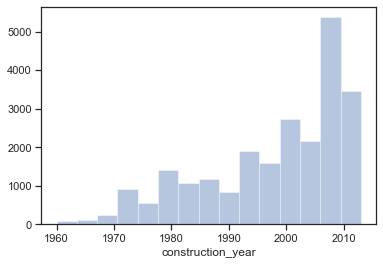

In [228]:
sns.distplot(df_2.construction_year, bins =15 ,kde=False)

The third random variable is population .It decribes the number of people living around the waterpump.Data value space for this random variable theoritically is defined by set of integers greater than zero.Although this random variable gives the discrete data value space but i have reduced the data value spave by binning several different population sizes together.As we can see below, the different bins that are created are listed next to the number of datapoints in each bins. the new bins will represent the discrete data value space for this random variable.

In [269]:
pd.cut(df_2['population'], 10).value_counts()

(51.7, 101.4]     4207
(1.503, 51.7]     3917
(101.4, 151.1]    3779
(200.8, 250.5]    2951
(151.1, 200.8]    2712
(250.5, 300.2]    2106
(349.9, 399.6]    1529
(399.6, 449.3]    1047
(449.3, 499.0]     765
(300.2, 349.9]     612
Name: population, dtype: int64

The plot below shows the distribution of the new discrete data value space of population random variable.

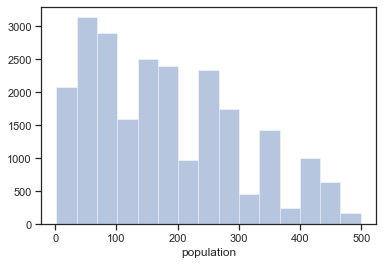

In [270]:

sns.distplot(pp.population, bins =15 ,kde=False)
plt.show()

In [231]:
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = pearsonr(x, y)[0]
    # Make the label
    label = r'$\rho$ = ' + str(coef)
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 10, xycoords = ax.transAxes)

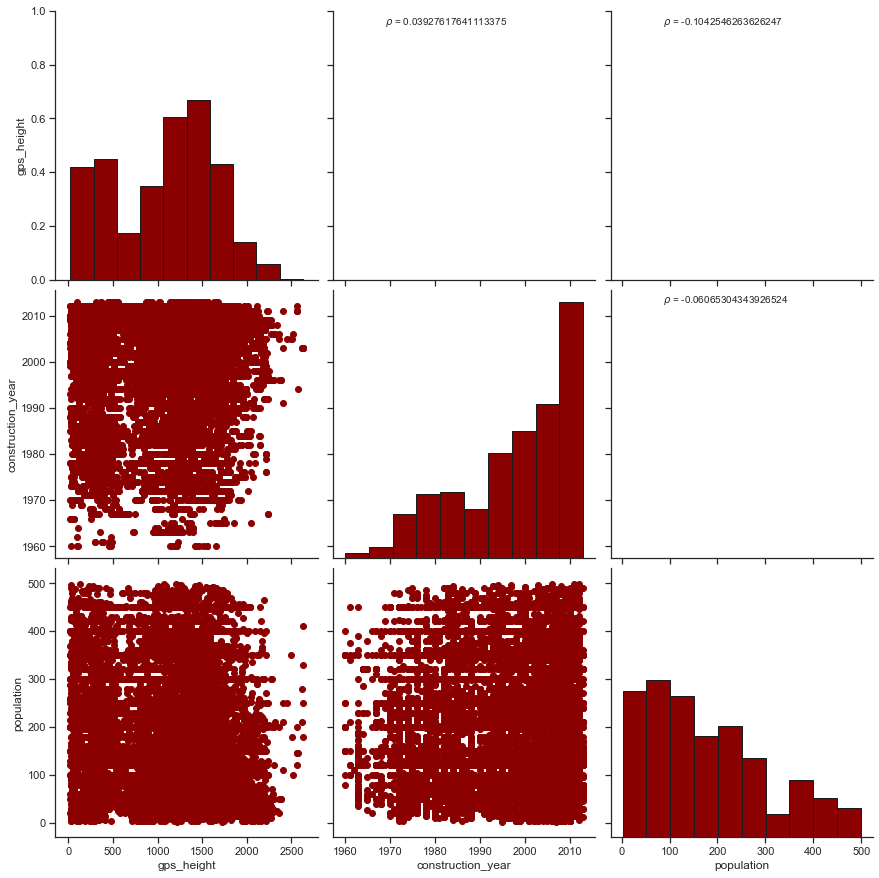

In [232]:
# Create a pair grid instance
grid = sns.PairGrid(data= df_2[df_2['gps_height']>20],
                    vars = ['gps_height', 'construction_year', 'population'], height = 4)

# Map the plots to the locations
#grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(plt.scatter, color = 'darkred')
grid = grid.map_diag(plt.hist, bins = 10 , edgecolor =  'k', color = 'darkred',)



In [233]:
pearsoncorr = df_2.corr(method='pearson')

In [234]:
pearsoncorr

,gps_height,construction_year,population
gps_height,1.000000,0.027437,-0.098636
construction_year,0.027437,1.000000,-0.060429
population,-0.098636,-0.060429,1.000000


The below plot shows the density function of random variables with respect to the class lables.

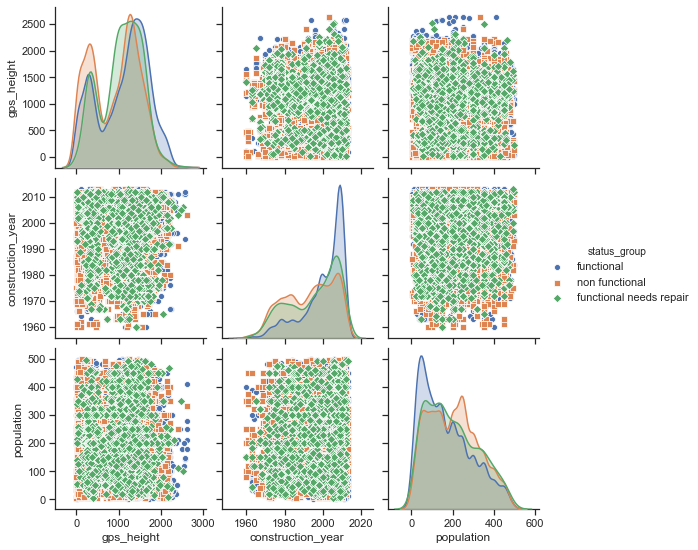

In [217]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data= df_2,hue='status_group',markers=["o", "s", "D"],dropna=True)
plt.show()